In [1]:
# Preliminaries needed for Python and to run R within a Python notebook
import rpy2.rinterface
%load_ext rpy2.ipython 

## Randomization Test in R

In [123]:
%%R
## Create the function that will perform the test:
rand_test <- function(x, y, summary, alternative, Nsim){
  n1 <- length(x)
  n2 <- length(y)
  if(summary == "mean"){
    t <- mean(x) - mean(y)
  }else if(summary == "median"){
    t <- median(x) - median(y)
  }
  comb <- c(x, y)
  t_star <- rep(0, Nsim)
  for(i in 1:Nsim){
    s <- sample(x = comb, size = length(comb), replace = F)
    x_star <- s[1:n1]
    y_star <- s[(n1+1):length(comb)]
    if(summary == "mean"){
      t_star[i] <- mean(x_star) - mean(y_star)  
    }else if(summary == "median"){
      t_star[i] <- median(x_star) - median(y_star)  
    } 
  }
  if(alternative == "two-sided"){
    p_value = sum(t_star >= abs(t))/Nsim + sum(t_star <= -abs(t))/Nsim
  }else if(alternative == "less"){
    p_value = sum(t_star <= t)/Nsim
  }else if(alternative == "greater"){
    p_value = sum(t_star >= t)/Nsim
  }
  print(paste("The p-value is ", p_value, ".", sep = ""))
}

Consider the Pokemon Go Example data:

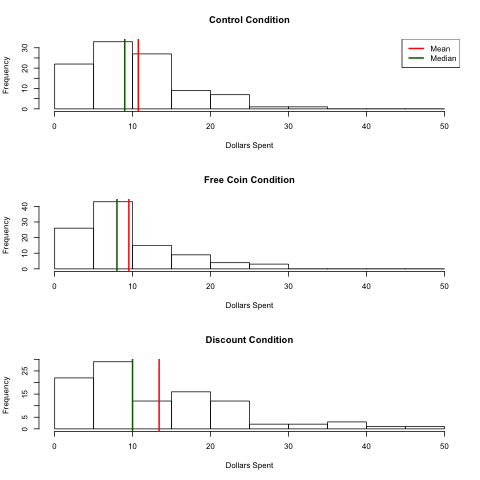

In [118]:
%%R
## Read in the data
setwd("/Users/ntstevens/Dropbox/Data Institute/DOE Certificate/Week 4/")
pokemon <- read.csv(file = "pokemongo.csv", header = T)

## Look at the data
par(mfrow = c(3,1))
hist(pokemon$control, xlim = c(0,50), breaks = seq(0,50,5), xlab = "Dollars Spent", main = "Control Condition")
abline(v = c(mean(pokemon$control), median(pokemon$control)), col = c("red", "darkgreen"), lwd = 2)
legend("topright", legend = c("Mean", "Median"), lty = 1, lwd = 2, col = c("red", "darkgreen"))
hist(pokemon$freecoins, xlim = c(0,50), breaks = seq(0,50,5), xlab = "Dollars Spent", main = "Free Coin Condition")
abline(v = c(mean(pokemon$freecoins), median(pokemon$freecoins)), col = c("red", "darkgreen"), lwd = 2)
hist(pokemon$discount, xlim = c(0,50), breaks = seq(0,50,5), xlab = "Dollars Spent", main = "Discount Condition")
abline(v = c(mean(pokemon$discount), median(pokemon$discount)), col = c("red", "darkgreen"), lwd = 2)

### Compare Means

In [124]:
%%R
## Compare Conditions 1 and 2 
rand_test(x = pokemon$control, y = pokemon$freecoins, summary = "mean", alternative = "two-sided", Nsim = 100000)

[1] "The p-value is 0.18751."


In [125]:
%%R
## Compare Conditions 1 and 3 
rand_test(x = pokemon$control, y = pokemon$discount, summary = "mean", alternative = "two-sided", Nsim = 100000)

[1] "The p-value is 0.02631."


In [126]:
%%R
## Compare Conditions 2 and 3 
rand_test(x = pokemon$freecoins, y = pokemon$discount, summary = "mean", alternative = "two-sided", Nsim = 100000)

[1] "The p-value is 0.00096."


### Compare Medians

In [128]:
%%R
## Compare Conditions 1 and 2 
rand_test(x = pokemon$control, y = pokemon$freecoins, summary = "median", alternative = "two-sided", Nsim = 100000)

[1] "The p-value is 0.57197."


In [129]:
%%R
## Compare Conditions 1 and 3 
rand_test(x = pokemon$control, y = pokemon$discount, summary = "median", alternative = "two-sided", Nsim = 100000)

[1] "The p-value is 0.79151."


In [130]:
%%R
## Compare Conditions 2 and 3 
rand_test(x = pokemon$freecoins, y = pokemon$discount, summary = "median", alternative = "two-sided", Nsim = 100000)

[1] "The p-value is 0.2523."


## Randomization Test in Python

In [162]:
def rand_test(x, y, summary, alternative, Nsim):
    n1 = len(x)
    n2 = len(y)
    if summary == 'mean':
        t = np.mean(x) - np.mean(y)
    elif summary == 'median':
        t = np.median(x) - np.median(y)
    comb = np.concatenate((x,y))
    t_star = np.zeros(Nsim, dtype = int)
    for i in range(Nsim):
        s = np.random.choice(comb, size = len(comb), replace = False) 
        x_star = s[:len(s)//2]
        y_star = s[len(s)//2:]
        if summary == 'mean':
            t_star[i] = np.mean(x_star) - np.mean(y_star)
        elif summary == 'median':
            t_star[i] = np.median(x_star) - np.median(y_star)
    if alternative == 'two-sided':
        p_value = np.sum(t_star >= np.abs(t))/Nsim + np.sum(t_star <= -np.abs(t))/Nsim
    elif alternative == 'less':
        p_value = np.sum(t_star <= t)/Nsim
    elif alternative == 'greater':
        p_value = np.sum(t_star >= t)/Nsim
    print("The p-value is", p_value)

Consider the Pokemon Go Example data:

Text(24.5,0.5,'Frequency')

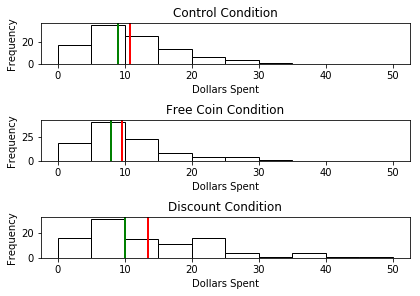

In [170]:
## Import necessary packages
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Change working directory
os.chdir("/Users/ntstevens/Dropbox/Data Institute/DOE Certificate/Week 4")

## Read in the data
data = pd.read_csv('pokemongo.csv')
cond1 = data["control"]
cond2 = data["freecoins"]
cond3 = data["discount"]

## Plot the data
plt.subplot(3,1,1)
plt.tight_layout()
plt.hist(cond1, range = [0,50], color = "white", edgecolor = "black")
plt.axvline(x = np.mean(cond1), color = "red", linewidth = 2)
plt.axvline(x = np.median(cond1), color = "green", linewidth = 2)
plt.title("Control Condition")
plt.xlabel("Dollars Spent")
plt.ylabel("Frequency")
plt.subplot(3,1,2)
plt.tight_layout()
plt.hist(cond2, range = [0,50], color = "white", edgecolor = "black")
plt.axvline(x = np.mean(cond2), color = "red", linewidth = 2)
plt.axvline(x = np.median(cond2), color = "green", linewidth = 2)
plt.title("Free Coin Condition")
plt.xlabel("Dollars Spent")
plt.ylabel("Frequency")
plt.subplot(3,1,3)
plt.tight_layout()
plt.hist(cond3, range = [0,50], color = "white", edgecolor = "black")
plt.axvline(x = np.mean(cond3), color = "red", linewidth = 2)
plt.axvline(x = np.median(cond3), color = "green", linewidth = 2)
plt.title("Discount Condition")
plt.xlabel("Dollars Spent")
plt.ylabel("Frequency")

### Compare Means

In [163]:
## Compare Conditions 1 and 2 
rand_test(x = cond1, y = cond2, summary = "mean", alternative = "two-sided", Nsim = 100000)

The p-value is 0.02656


In [164]:
## Compare Conditions 1 and 3 
rand_test(x = cond1, y = cond3, summary = "mean", alternative = "two-sided", Nsim = 100000)

The p-value is 0.0116


In [165]:
## Compare Conditions 2 and 3 
rand_test(x = cond2, y = cond3, summary = "mean", alternative = "two-sided", Nsim = 100000)

The p-value is 0.00078


### Compare Medians

In [166]:
## Compare Conditions 1 and 2 
rand_test(x = cond1, y = cond2, summary = "median", alternative = "two-sided", Nsim = 100000)

The p-value is 0.57155


In [167]:
## Compare Conditions 1 and 3 
rand_test(x = cond1, y = cond3, summary = "median", alternative = "two-sided", Nsim = 100000)

The p-value is 0.79121


In [168]:
## Compare Conditions 2 and 3 
rand_test(x = cond2, y = cond3, summary = "median", alternative = "two-sided", Nsim = 100000)

The p-value is 0.24947
